In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from  sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
train_data=pd.read_csv('humansmartphonetrain.csv')
test_data=pd.read_csv('humansmartphonetest.csv')


In [5]:
print(train_data.shape)
print(test_data.shape)

(7352, 563)
(2947, 563)


In [6]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [7]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [8]:
print(list(train_data.columns))

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [9]:
train_data.loc[:,'tBodyAccMag-mean()']

0      -0.959434
1      -0.979289
2      -0.983703
3      -0.986542
4      -0.992827
          ...   
7347   -0.031719
7348   -0.065256
7349   -0.003936
7350   -0.002445
7351   -0.049090
Name: tBodyAccMag-mean(), Length: 7352, dtype: float64

In [10]:
test_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [11]:
#Checking duplicates
print('number of duplicates: '+str(train_data.duplicated().sum()))

number of duplicates: 0


In [12]:
#Checking missing values
print(train_data.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


#Conclusion
No duplicates 
no Missing values

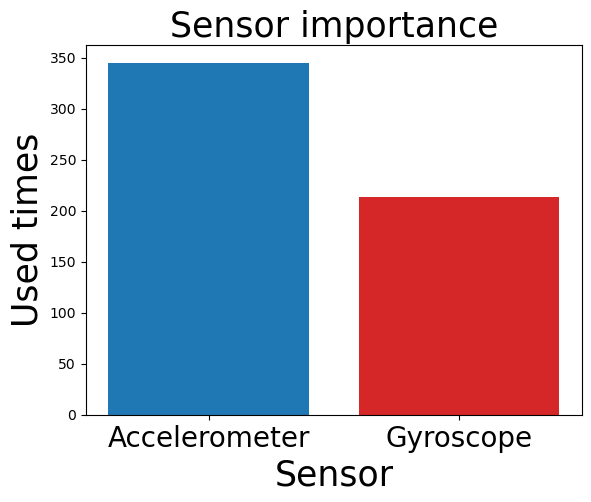

In [13]:
Acc=0
Gyro=0
other=0
for i in train_data.columns:
    if 'Acc' in i:
        Acc+=1
    elif 'Gyro' in i:
        Gyro+=1
    else:
        other+=1
        
plt.figure()
plt.bar(x=["Accelerometer","Gyroscope"],height=[Acc,Gyro],color=['tab:blue','tab:red'])
plt.title("Sensor importance",fontsize=25)
plt.xlabel("Sensor",fontsize=25)
plt.ylabel("Used times",size=25)
plt.xticks(fontsize=20)
plt.show()

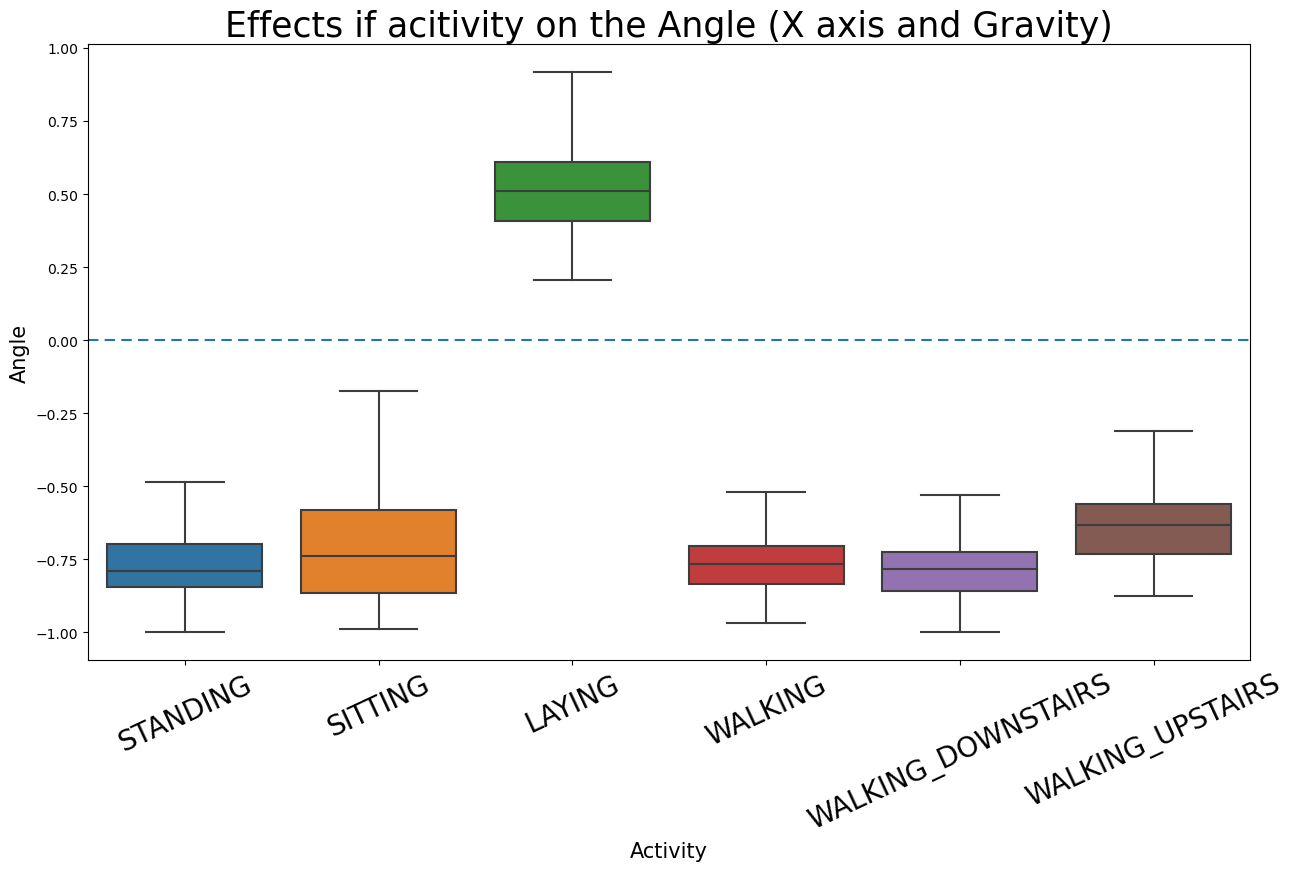

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Activity',y='angle(X,gravityMean)',data=train_data,showfliers=False)
plt.axhline(y=0,xmin=0,xmax=1,dashes=[5,3])
plt.title("Effects if acitivity on the Angle (X axis and Gravity)",size=25)
plt.xlabel('Activity',size=15)
plt.ylabel('Angle',size=15)
plt.xticks(rotation=25,size=20)
plt.show()

Text(0.5, 1.0, 'Data by each user')

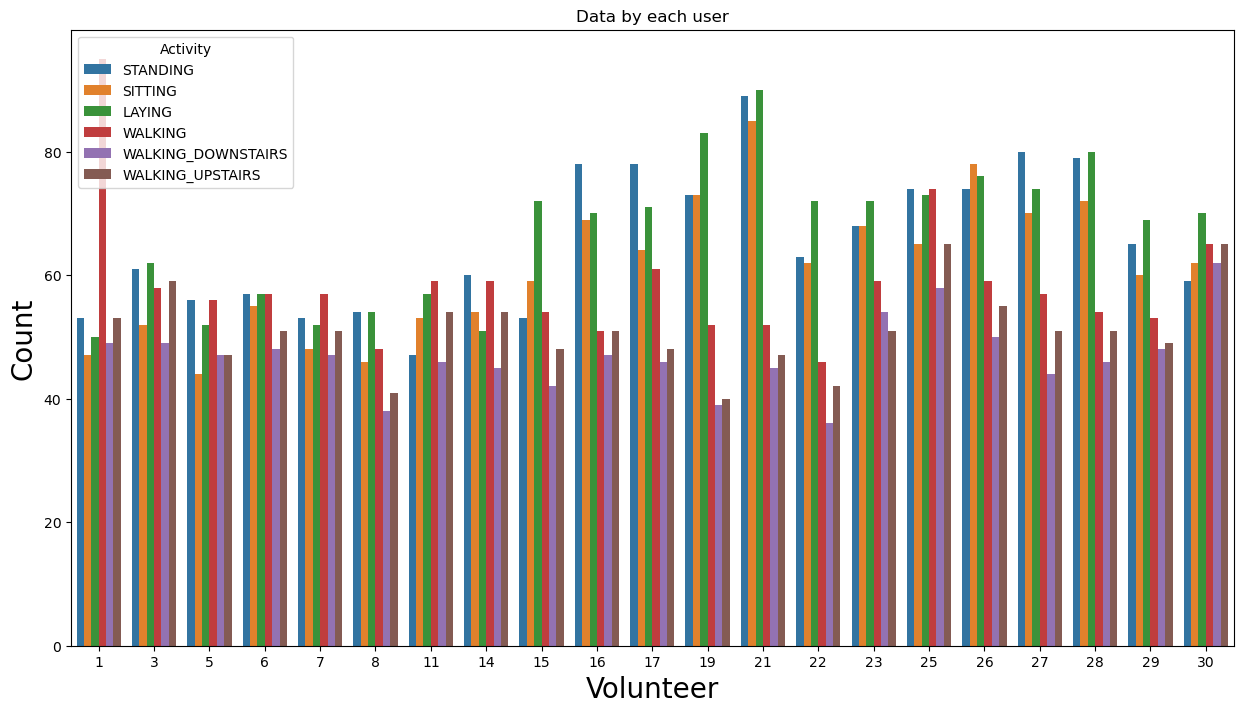

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x='subject',hue='Activity',data=train_data)
plt.xlabel('Volunteer',size=20)
plt.ylabel('Count',size=20)
plt.title('Data by each user')

# Stationary and moving activities

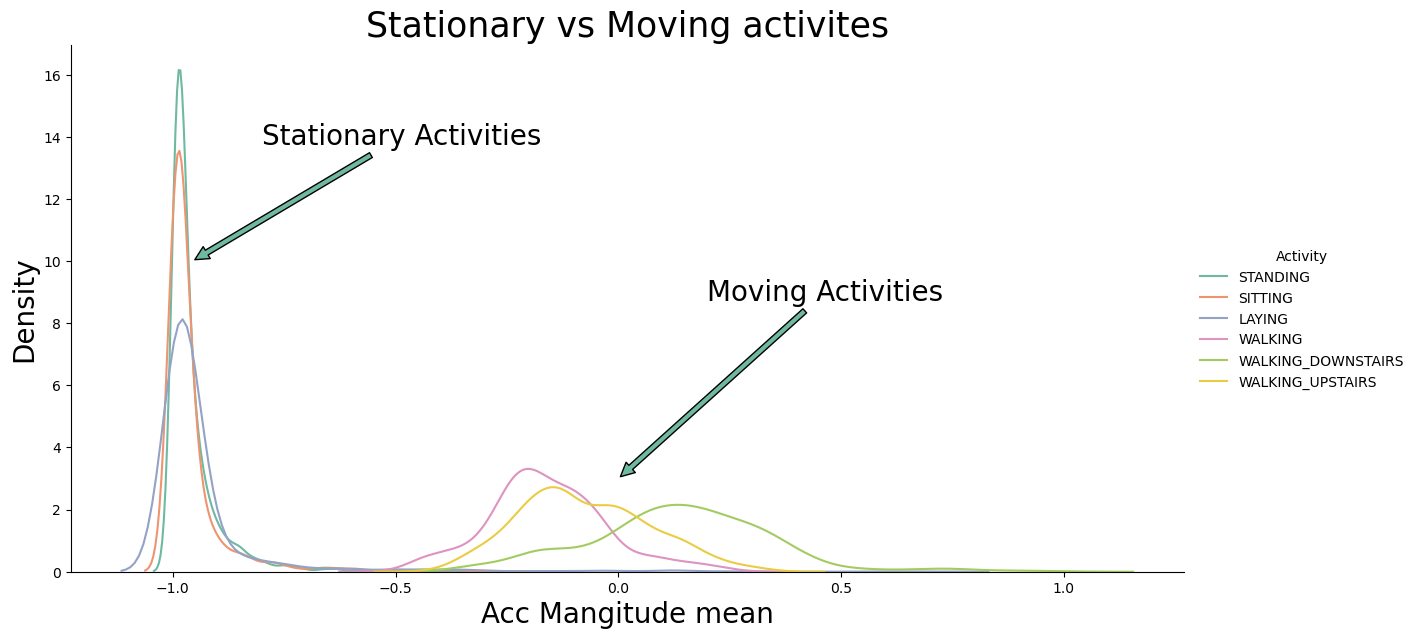

In [16]:
sns.set_palette("Set2",desat=0.80)
facetgrid=sns.FacetGrid(train_data,hue="Activity",size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist=False)\
              .add_legend()

plt.annotate("Stationary Activities",xy=(-0.956,10),xytext=(-0.8,14),size=20,\
            va='center',ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3"))

plt.annotate("Moving Activities",xy=(0,3),xytext=(0.2,9),size=20,\
            va='center',ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3"))

plt.title("Stationary vs Moving activites",size=25)
plt.xlabel("Acc Mangitude mean",size=20)
plt.ylabel("Density",size=20)
plt.show()





In [17]:
print(len(train_data.filter(regex='tBodyAccMag').columns.to_list()))

13


In [18]:
train_data.filter(regex='tBodyAccMag').columns.to_list()

['tBodyAccMag-mean()',
 'tBodyAccMag-std()',
 'tBodyAccMag-mad()',
 'tBodyAccMag-max()',
 'tBodyAccMag-min()',
 'tBodyAccMag-sma()',
 'tBodyAccMag-energy()',
 'tBodyAccMag-iqr()',
 'tBodyAccMag-entropy()',
 'tBodyAccMag-arCoeff()1',
 'tBodyAccMag-arCoeff()2',
 'tBodyAccMag-arCoeff()3',
 'tBodyAccMag-arCoeff()4']

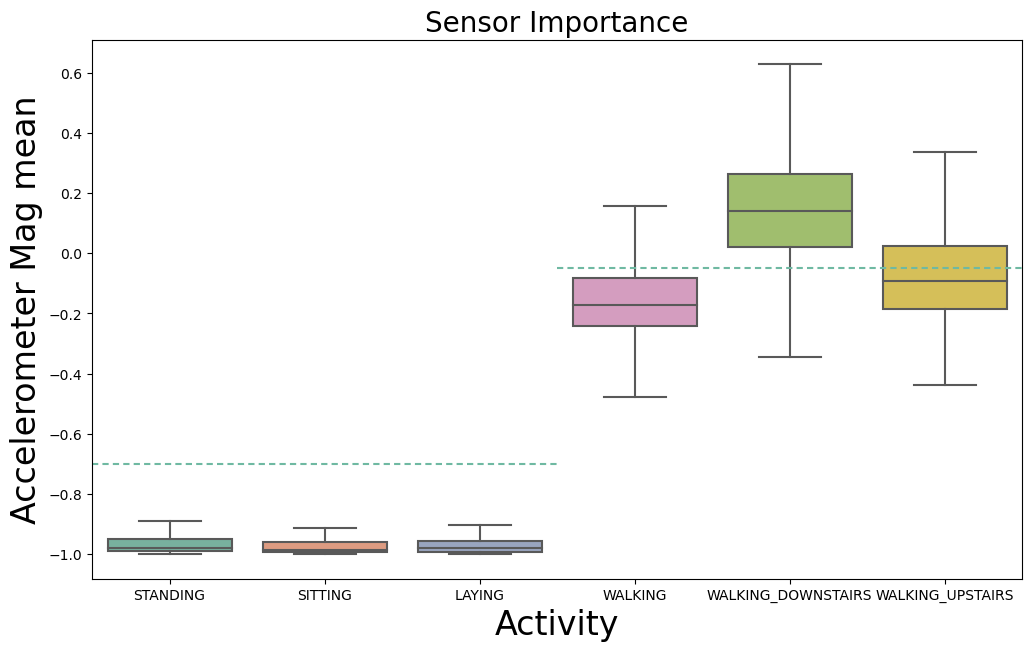

In [19]:
#Classifying activities into static and dynamic
plt.figure(figsize=(12,7))
sns.boxplot(x="Activity",y="tBodyAccMag-mean()",data=train_data,showfliers=False)
plt.title("Sensor Importance",size=20)
plt.xlabel("Activity",size=24)
plt.ylabel("Accelerometer Mag mean",size=24)
plt.axhline(y=-0.05,xmin=0.5,dashes=(3,2))
plt.axhline(y=-0.7,xmax=0.5,dashes=(3,2))
plt.show()

In [20]:
fig=px.pie(train_data,names="Axtivity",width=980)
fig.update_layout(
    title={
        'text':"Activities distribution in  the data",
        'x':0.95,
        'y':0.40,
        'xanchor':'center',
        'yanchor':'top'},
         legend_title="Activities",
         font=dict(
         family="Arial",
         size=18))
fig.show()
    

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-sma()', 'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y', 'tGravityAcc-entropy()-Z', 'tGravityAcc-arCoeff()-X,1', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4', 'tGravityAcc-correlation()-X,Y', 'tGravityAcc-correlation()-X,Z', 'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-max()-X', 'tBodyAccJerk-max()-Y', 'tBodyAccJerk-max()-Z', 'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z', 'tBodyAccJerk-sma()', 'tBodyAccJerk-energy()-X', 'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-energy()-Z', 'tBodyAccJerk-iqr()-X', 'tBodyAccJerk-iqr()-Y', 'tBodyAccJerk-iqr()-Z', 'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-entropy()-Y', 'tBodyAccJerk-entropy()-Z', 'tBodyAccJerk-arCoeff()-X,1', 'tBodyAccJerk-arCoeff()-X,2', 'tBodyAccJerk-arCoeff()-X,3', 'tBodyAccJerk-arCoeff()-X,4', 'tBodyAccJerk-arCoeff()-Y,1', 'tBodyAccJerk-arCoeff()-Y,2', 'tBodyAccJerk-arCoeff()-Y,3', 'tBodyAccJerk-arCoeff()-Y,4', 'tBodyAccJerk-arCoeff()-Z,1', 'tBodyAccJerk-arCoeff()-Z,2', 'tBodyAccJerk-arCoeff()-Z,3', 'tBodyAccJerk-arCoeff()-Z,4', 'tBodyAccJerk-correlation()-X,Y', 'tBodyAccJerk-correlation()-X,Z', 'tBodyAccJerk-correlation()-Y,Z', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z', 'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y', 'tBodyGyro-mad()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-max()-Y', 'tBodyGyro-max()-Z', 'tBodyGyro-min()-X', 'tBodyGyro-min()-Y', 'tBodyGyro-min()-Z', 'tBodyGyro-sma()', 'tBodyGyro-energy()-X', 'tBodyGyro-energy()-Y', 'tBodyGyro-energy()-Z', 'tBodyGyro-iqr()-X', 'tBodyGyro-iqr()-Y', 'tBodyGyro-iqr()-Z', 'tBodyGyro-entropy()-X', 'tBodyGyro-entropy()-Y', 'tBodyGyro-entropy()-Z', 'tBodyGyro-arCoeff()-X,1', 'tBodyGyro-arCoeff()-X,2', 'tBodyGyro-arCoeff()-X,3', 'tBodyGyro-arCoeff()-X,4', 'tBodyGyro-arCoeff()-Y,1', 'tBodyGyro-arCoeff()-Y,2', 'tBodyGyro-arCoeff()-Y,3', 'tBodyGyro-arCoeff()-Y,4', 'tBodyGyro-arCoeff()-Z,1', 'tBodyGyro-arCoeff()-Z,2', 'tBodyGyro-arCoeff()-Z,3', 'tBodyGyro-arCoeff()-Z,4', 'tBodyGyro-correlation()-X,Y', 'tBodyGyro-correlation()-X,Z', 'tBodyGyro-correlation()-Y,Z', 'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Y', 'tBodyGyroJerk-std()-Z', 'tBodyGyroJerk-mad()-X', 'tBodyGyroJerk-mad()-Y', 'tBodyGyroJerk-mad()-Z', 'tBodyGyroJerk-max()-X', 'tBodyGyroJerk-max()-Y', 'tBodyGyroJerk-max()-Z', 'tBodyGyroJerk-min()-X', 'tBodyGyroJerk-min()-Y', 'tBodyGyroJerk-min()-Z', 'tBodyGyroJerk-sma()', 'tBodyGyroJerk-energy()-X', 'tBodyGyroJerk-energy()-Y', 'tBodyGyroJerk-energy()-Z', 'tBodyGyroJerk-iqr()-X', 'tBodyGyroJerk-iqr()-Y', 'tBodyGyroJerk-iqr()-Z', 'tBodyGyroJerk-entropy()-X', 'tBodyGyroJerk-entropy()-Y', 'tBodyGyroJerk-entropy()-Z', 'tBodyGyroJerk-arCoeff()-X,1', 'tBodyGyroJerk-arCoeff()-X,2', 'tBodyGyroJerk-arCoeff()-X,3', 'tBodyGyroJerk-arCoeff()-X,4', 'tBodyGyroJerk-arCoeff()-Y,1', 'tBodyGyroJerk-arCoeff()-Y,2', 'tBodyGyroJerk-arCoeff()-Y,3', 'tBodyGyroJerk-arCoeff()-Y,4', 'tBodyGyroJerk-arCoeff()-Z,1', 'tBodyGyroJerk-arCoeff()-Z,2', 'tBodyGyroJerk-arCoeff()-Z,3', 'tBodyGyroJerk-arCoeff()-Z,4', 'tBodyGyroJerk-correlation()-X,Y', 'tBodyGyroJerk-correlation()-X,Z', 'tBodyGyroJerk-correlation()-Y,Z', 'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()', 'tBodyAccMag-max()', 'tBodyAccMag-min()', 'tBodyAccMag-sma()', 'tBodyAccMag-energy()', 'tBodyAccMag-iqr()', 'tBodyAccMag-entropy()', 'tBodyAccMag-arCoeff()1', 'tBodyAccMag-arCoeff()2', 'tBodyAccMag-arCoeff()3', 'tBodyAccMag-arCoeff()4', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tGravityAccMag-sma()', 'tGravityAccMag-energy()', 'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()', 'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-min()', 'tBodyAccJerkMag-sma()', 'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-iqr()', 'tBodyAccJerkMag-entropy()', 'tBodyAccJerkMag-arCoeff()1', 'tBodyAccJerkMag-arCoeff()2', 'tBodyAccJerkMag-arCoeff()3', 'tBodyAccJerkMag-arCoeff()4', 'tBodyGyroMag-mean()', 'tBodyGyroMag-std()', 'tBodyGyroMag-mad()', 'tBodyGyroMag-max()', 'tBodyGyroMag-min()', 'tBodyGyroMag-sma()', 'tBodyGyroMag-energy()', 'tBodyGyroMag-iqr()', 'tBodyGyroMag-entropy()', 'tBodyGyroMag-arCoeff()1', 'tBodyGyroMag-arCoeff()2', 'tBodyGyroMag-arCoeff()3', 'tBodyGyroMag-arCoeff()4', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()', 'tBodyGyroJerkMag-mad()', 'tBodyGyroJerkMag-max()', 'tBodyGyroJerkMag-min()', 'tBodyGyroJerkMag-sma()', 'tBodyGyroJerkMag-energy()', 'tBodyGyroJerkMag-iqr()', 'tBodyGyroJerkMag-entropy()', 'tBodyGyroJerkMag-arCoeff()1', 'tBodyGyroJerkMag-arCoeff()2', 'tBodyGyroJerkMag-arCoeff()3', 'tBodyGyroJerkMag-arCoeff()4', 'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y', 'fBodyAcc-mean()-Z', 'fBodyAcc-std()-X', 'fBodyAcc-std()-Y', 'fBodyAcc-std()-Z', 'fBodyAcc-mad()-X', 'fBodyAcc-mad()-Y', 'fBodyAcc-mad()-Z', 'fBodyAcc-max()-X', 'fBodyAcc-max()-Y', 'fBodyAcc-max()-Z', 'fBodyAcc-min()-X', 'fBodyAcc-min()-Y', 'fBodyAcc-min()-Z', 'fBodyAcc-sma()', 'fBodyAcc-energy()-X', 'fBodyAcc-energy()-Y', 'fBodyAcc-energy()-Z', 'fBodyAcc-iqr()-X', 'fBodyAcc-iqr()-Y', 'fBodyAcc-iqr()-Z', 'fBodyAcc-entropy()-X', 'fBodyAcc-entropy()-Y', 'fBodyAcc-entropy()-Z', 'fBodyAcc-maxInds-X', 'fBodyAcc-maxInds-Y', 'fBodyAcc-maxInds-Z', 'fBodyAcc-meanFreq()-X', 'fBodyAcc-meanFreq()-Y', 'fBodyAcc-meanFreq()-Z', 'fBodyAcc-skewness()-X', 'fBodyAcc-kurtosis()-X', 'fBodyAcc-skewness()-Y', 'fBodyAcc-kurtosis()-Y', 'fBodyAcc-skewness()-Z', 'fBodyAcc-kurtosis()-Z', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-1,8.1', 'fBodyAcc-bandsEnergy()-9,16.1', 'fBodyAcc-bandsEnergy()-17,24.1', 'fBodyAcc-bandsEnergy()-25,32.1', 'fBodyAcc-bandsEnergy()-33,40.1', 'fBodyAcc-bandsEnergy()-41,48.1', 'fBodyAcc-bandsEnergy()-49,56.1', 'fBodyAcc-bandsEnergy()-57,64.1', 'fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-17,32.1', 'fBodyAcc-bandsEnergy()-33,48.1', 'fBodyAcc-bandsEnergy()-49,64.1', 'fBodyAcc-bandsEnergy()-1,24.1', 'fBodyAcc-bandsEnergy()-25,48.1', 'fBodyAcc-bandsEnergy()-1,8.2', 'fBodyAcc-bandsEnergy()-9,16.2', 'fBodyAcc-bandsEnergy()-17,24.2', 'fBodyAcc-bandsEnergy()-25,32.2', 'fBodyAcc-bandsEnergy()-33,40.2', 'fBodyAcc-bandsEnergy()-41,48.2', 'fBodyAcc-bandsEnergy()-49,56.2', 'fBodyAcc-bandsEnergy()-57,64.2', 'fBodyAcc-bandsEnergy()-1,16.2', 'fBodyAcc-bandsEnergy()-17,32.2', 'fBodyAcc-bandsEnergy()-33,48.2', 'fBodyAcc-bandsEnergy()-49,64.2', 'fBodyAcc-bandsEnergy()-1,24.2', 'fBodyAcc-bandsEnergy()-25,48.2', 'fBodyAccJerk-mean()-X', 'fBodyAccJerk-mean()-Y', 'fBodyAccJerk-mean()-Z', 'fBodyAccJerk-std()-X', 'fBodyAccJerk-std()-Y', 'fBodyAccJerk-std()-Z', 'fBodyAccJerk-mad()-X', 'fBodyAccJerk-mad()-Y', 'fBodyAccJerk-mad()-Z', 'fBodyAccJerk-max()-X', 'fBodyAccJerk-max()-Y', 'fBodyAccJerk-max()-Z', 'fBodyAccJerk-min()-X', 'fBodyAccJerk-min()-Y', 'fBodyAccJerk-min()-Z', 'fBodyAccJerk-sma()', 'fBodyAccJerk-energy()-X', 'fBodyAccJerk-energy()-Y', 'fBodyAccJerk-energy()-Z', 'fBodyAccJerk-iqr()-X', 'fBodyAccJerk-iqr()-Y', 'fBodyAccJerk-iqr()-Z', 'fBodyAccJerk-entropy()-X', 'fBodyAccJerk-entropy()-Y', 'fBodyAccJerk-entropy()-Z', 'fBodyAccJerk-maxInds-X', 'fBodyAccJerk-maxInds-Y', 'fBodyAccJerk-maxInds-Z', 'fBodyAccJerk-meanFreq()-X', 'fBodyAccJerk-meanFreq()-Y', 'fBodyAccJerk-meanFreq()-Z', 'fBodyAccJerk-skewness()-X', 'fBodyAccJerk-kurtosis()-X', 'fBodyAccJerk-skewness()-Y', 'fBodyAccJerk-kurtosis()-Y', 'fBodyAccJerk-skewness()-Z', 'fBodyAccJerk-kurtosis()-Z', 'fBodyAccJerk-bandsEnergy()-1,8', 'fBodyAccJerk-bandsEnergy()-9,16', 'fBodyAccJerk-bandsEnergy()-17,24', 'fBodyAccJerk-bandsEnergy()-25,32', 'fBodyAccJerk-bandsEnergy()-33,40', 'fBodyAccJerk-bandsEnergy()-41,48', 'fBodyAccJerk-bandsEnergy()-49,56', 'fBodyAccJerk-bandsEnergy()-57,64', 'fBodyAccJerk-bandsEnergy()-1,16', 'fBodyAccJerk-bandsEnergy()-17,32', 'fBodyAccJerk-bandsEnergy()-33,48', 'fBodyAccJerk-bandsEnergy()-49,64', 'fBodyAccJerk-bandsEnergy()-1,24', 'fBodyAccJerk-bandsEnergy()-25,48', 'fBodyAccJerk-bandsEnergy()-1,8.1', 'fBodyAccJerk-bandsEnergy()-9,16.1', 'fBodyAccJerk-bandsEnergy()-17,24.1', 'fBodyAccJerk-bandsEnergy()-25,32.1', 'fBodyAccJerk-bandsEnergy()-33,40.1', 'fBodyAccJerk-bandsEnergy()-41,48.1', 'fBodyAccJerk-bandsEnergy()-49,56.1', 'fBodyAccJerk-bandsEnergy()-57,64.1', 'fBodyAccJerk-bandsEnergy()-1,16.1', 'fBodyAccJerk-bandsEnergy()-17,32.1', 'fBodyAccJerk-bandsEnergy()-33,48.1', 'fBodyAccJerk-bandsEnergy()-49,64.1', 'fBodyAccJerk-bandsEnergy()-1,24.1', 'fBodyAccJerk-bandsEnergy()-25,48.1', 'fBodyAccJerk-bandsEnergy()-1,8.2', 'fBodyAccJerk-bandsEnergy()-9,16.2', 'fBodyAccJerk-bandsEnergy()-17,24.2', 'fBodyAccJerk-bandsEnergy()-25,32.2', 'fBodyAccJerk-bandsEnergy()-33,40.2', 'fBodyAccJerk-bandsEnergy()-41,48.2', 'fBodyAccJerk-bandsEnergy()-49,56.2', 'fBodyAccJerk-bandsEnergy()-57,64.2', 'fBodyAccJerk-bandsEnergy()-1,16.2', 'fBodyAccJerk-bandsEnergy()-17,32.2', 'fBodyAccJerk-bandsEnergy()-33,48.2', 'fBodyAccJerk-bandsEnergy()-49,64.2', 'fBodyAccJerk-bandsEnergy()-1,24.2', 'fBodyAccJerk-bandsEnergy()-25,48.2', 'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z', 'fBodyGyro-std()-X', 'fBodyGyro-std()-Y', 'fBodyGyro-std()-Z', 'fBodyGyro-mad()-X', 'fBodyGyro-mad()-Y', 'fBodyGyro-mad()-Z', 'fBodyGyro-max()-X', 'fBodyGyro-max()-Y', 'fBodyGyro-max()-Z', 'fBodyGyro-min()-X', 'fBodyGyro-min()-Y', 'fBodyGyro-min()-Z', 'fBodyGyro-sma()', 'fBodyGyro-energy()-X', 'fBodyGyro-energy()-Y', 'fBodyGyro-energy()-Z', 'fBodyGyro-iqr()-X', 'fBodyGyro-iqr()-Y', 'fBodyGyro-iqr()-Z', 'fBodyGyro-entropy()-X', 'fBodyGyro-entropy()-Y', 'fBodyGyro-entropy()-Z', 'fBodyGyro-maxInds-X', 'fBodyGyro-maxInds-Y', 'fBodyGyro-maxInds-Z', 'fBodyGyro-meanFreq()-X', 'fBodyGyro-meanFreq()-Y', 'fBodyGyro-meanFreq()-Z', 'fBodyGyro-skewness()-X', 'fBodyGyro-kurtosis()-X', 'fBodyGyro-skewness()-Y', 'fBodyGyro-kurtosis()-Y', 'fBodyGyro-skewness()-Z', 'fBodyGyro-kurtosis()-Z', 'fBodyGyro-bandsEnergy()-1,8', 'fBodyGyro-bandsEnergy()-9,16', 'fBodyGyro-bandsEnergy()-17,24', 'fBodyGyro-bandsEnergy()-25,32', 'fBodyGyro-bandsEnergy()-33,40', 'fBodyGyro-bandsEnergy()-41,48', 'fBodyGyro-bandsEnergy()-49,56', 'fBodyGyro-bandsEnergy()-57,64', 'fBodyGyro-bandsEnergy()-1,16', 'fBodyGyro-bandsEnergy()-17,32', 'fBodyGyro-bandsEnergy()-33,48', 'fBodyGyro-bandsEnergy()-49,64', 'fBodyGyro-bandsEnergy()-1,24', 'fBodyGyro-bandsEnergy()-25,48', 'fBodyGyro-bandsEnergy()-1,8.1', 'fBodyGyro-bandsEnergy()-9,16.1', 'fBodyGyro-bandsEnergy()-17,24.1', 'fBodyGyro-bandsEnergy()-25,32.1', 'fBodyGyro-bandsEnergy()-33,40.1', 'fBodyGyro-bandsEnergy()-41,48.1', 'fBodyGyro-bandsEnergy()-49,56.1', 'fBodyGyro-bandsEnergy()-57,64.1', 'fBodyGyro-bandsEnergy()-1,16.1', 'fBodyGyro-bandsEnergy()-17,32.1', 'fBodyGyro-bandsEnergy()-33,48.1', 'fBodyGyro-bandsEnergy()-49,64.1', 'fBodyGyro-bandsEnergy()-1,24.1', 'fBodyGyro-bandsEnergy()-25,48.1', 'fBodyGyro-bandsEnergy()-1,8.2', 'fBodyGyro-bandsEnergy()-9,16.2', 'fBodyGyro-bandsEnergy()-17,24.2', 'fBodyGyro-bandsEnergy()-25,32.2', 'fBodyGyro-bandsEnergy()-33,40.2', 'fBodyGyro-bandsEnergy()-41,48.2', 'fBodyGyro-bandsEnergy()-49,56.2', 'fBodyGyro-bandsEnergy()-57,64.2', 'fBodyGyro-bandsEnergy()-1,16.2', 'fBodyGyro-bandsEnergy()-17,32.2', 'fBodyGyro-bandsEnergy()-33,48.2', 'fBodyGyro-bandsEnergy()-49,64.2', 'fBodyGyro-bandsEnergy()-1,24.2', 'fBodyGyro-bandsEnergy()-25,48.2', 'fBodyAccMag-mean()', 'fBodyAccMag-std()', 'fBodyAccMag-mad()', 'fBodyAccMag-max()', 'fBodyAccMag-min()', 'fBodyAccMag-sma()', 'fBodyAccMag-energy()', 'fBodyAccMag-iqr()', 'fBodyAccMag-entropy()', 'fBodyAccMag-maxInds', 'fBodyAccMag-meanFreq()', 'fBodyAccMag-skewness()', 'fBodyAccMag-kurtosis()', 'fBodyBodyAccJerkMag-mean()', 'fBodyBodyAccJerkMag-std()', 'fBodyBodyAccJerkMag-mad()', 'fBodyBodyAccJerkMag-max()', 'fBodyBodyAccJerkMag-min()', 'fBodyBodyAccJerkMag-sma()', 'fBodyBodyAccJerkMag-energy()', 'fBodyBodyAccJerkMag-iqr()', 'fBodyBodyAccJerkMag-entropy()', 'fBodyBodyAccJerkMag-maxInds', 'fBodyBodyAccJerkMag-meanFreq()', 'fBodyBodyAccJerkMag-skewness()', 'fBodyBodyAccJerkMag-kurtosis()', 'fBodyBodyGyroMag-mean()', 'fBodyBodyGyroMag-std()', 'fBodyBodyGyroMag-mad()', 'fBodyBodyGyroMag-max()', 'fBodyBodyGyroMag-min()', 'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroMag-energy()', 'fBodyBodyGyroMag-iqr()', 'fBodyBodyGyroMag-entropy()', 'fBodyBodyGyroMag-maxInds', 'fBodyBodyGyroMag-meanFreq()', 'fBodyBodyGyroMag-skewness()', 'fBodyBodyGyroMag-kurtosis()', 'fBodyBodyGyroJerkMag-mean()', 'fBodyBodyGyroJerkMag-std()', 'fBodyBodyGyroJerkMag-mad()', 'fBodyBodyGyroJerkMag-max()', 'fBodyBodyGyroJerkMag-min()', 'fBodyBodyGyroJerkMag-sma()', 'fBodyBodyGyroJerkMag-energy()', 'fBodyBodyGyroJerkMag-iqr()', 'fBodyBodyGyroJerkMag-entropy()', 'fBodyBodyGyroJerkMag-maxInds', 'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyGyroMean,gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'] but received: Axtivity

In [21]:
#Removing the () from column names
columns=train_data.columns

columns=columns.str.replace('[()]','')
columns=columns.str.replace('[()]','')
columns=columns.str.replace('[()]','')
train_data.columns=columns
test_data.columns=columns

In [22]:
def perform_tsne(X_data,y_data,perplexities,n_iter=1000,img_name_prefix='t_sne'):
    for index,perplexity in enumerate(perplexities):
        X_reduced=TSNE(verbose=2,perplexity=perplexity).fit_transform(X_data)
        print("Creating plot for this t_sne visualization")
        df=pd.DataFrame({'x':X_reduced[:,0],'y':X_reduced[:,1],'label':y_data})
        sns.lmplot(data=df,x='x',y='y',hue='label',fit_reg=False,size=8,\
                  palette="Set1",markers=['^','v','s','o','1','2'])
        plt.title("perplexity:{} and max_iter: {}".format(perplexity,n_iter))
        img_name=img_name_prefix+'_perp_{}_iter_{}.png'.format(perplexity,n_iter)
        print("Saving this plot as image in present working directory..")
        plt.savefig(img_name)
        plt.show()
        print("Done")

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 0.829s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.137s
[t-SNE] Iteration 50: error = 96.2189484, gradient norm = 0.0308969 (50 iterations in 1.390s)
[t-SNE] Iteration 100: error = 83.9356537, gradient norm = 0.0058218 (50 iterations in 1.109s)
[t-SNE] Iteration 150: error = 81.9832077, gradient norm = 0

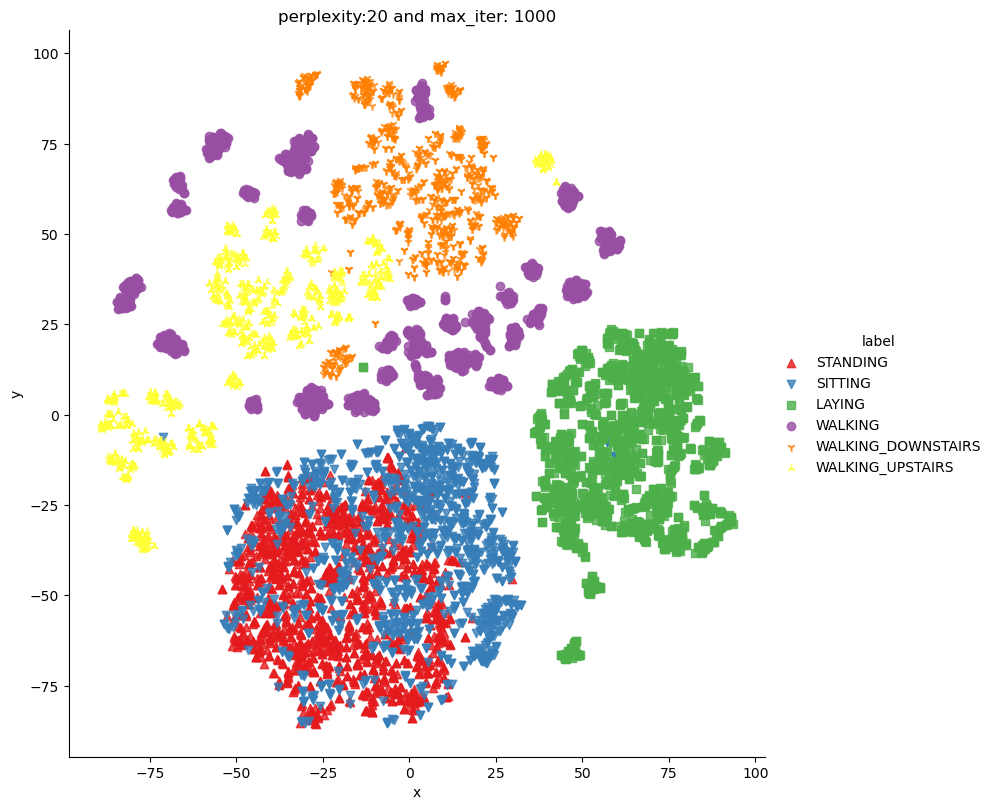

Done


In [23]:
X_pre_tsne=train_data.drop(['subject','Activity'],axis=1)
y_pre_tsne=train_data['Activity']
perform_tsne(X_data=X_pre_tsne,y_data=y_pre_tsne,perplexities=[20])


In [24]:
data = pd.concat([train_data, test_data])
data = train_data.sample(frac=1)
f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')]

X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']

X_f = f_df.drop(['subject', 'Activity'], axis=1)
y_f = f_df['Activity']

X_t = t_df.drop(['subject', 'Activity'], axis=1)
y_t = t_df['Activity']


pca = PCA(n_components=0.99)
pca.fit(X)
x_reduced = pca.transform(X)

print('Frequency components number is {} Time components number is {}'.format(X_f.shape[1], X.shape[1] - X_f.shape[1]))
print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True, random_state=42)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, shuffle=True, random_state=42)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, shuffle=True, random_state=42)

Frequency components number is 296 Time components number is 265
Original number of features 561 Reduced number of features 155


In [25]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Logistic Regression 98.96276143513008  Test Accuracy Logistic Regression 98.43643779741672
Training Precesion Logistic Regression 98.96276143513008  Test Precesion Logistic Regression 98.43643779741672
Training Recall Logistic Regression 98.96276143513008  Test Recall Logistic Regression 98.43643779741672


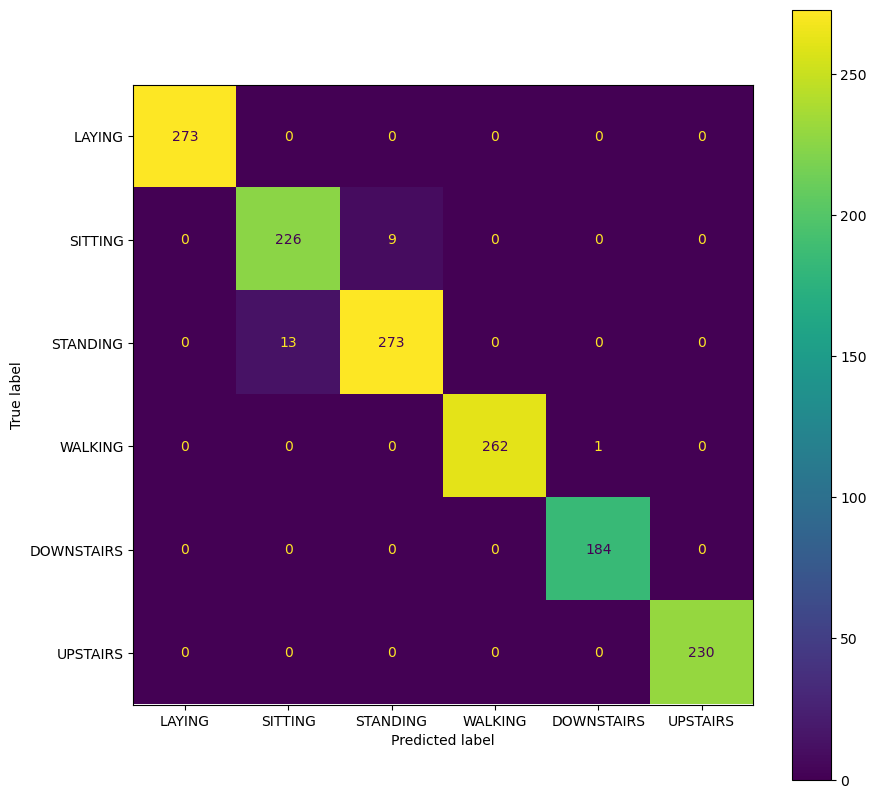

In [26]:
lr=LogisticRegression().fit(x_train,y_train)
evaluate_classification(lr,"Logistic Regression",x_train,x_test,y_train,y_test)

Training Accuracy LinearDiscriminantAnalysis 98.72470668253699  Test Accuracy LinearDiscriminantAnalysis 97.89259007477906
Training Precesion LinearDiscriminantAnalysis 98.72470668253699  Test Precesion LinearDiscriminantAnalysis 97.89259007477906
Training Recall LinearDiscriminantAnalysis 98.72470668253699  Test Recall LinearDiscriminantAnalysis 97.89259007477906


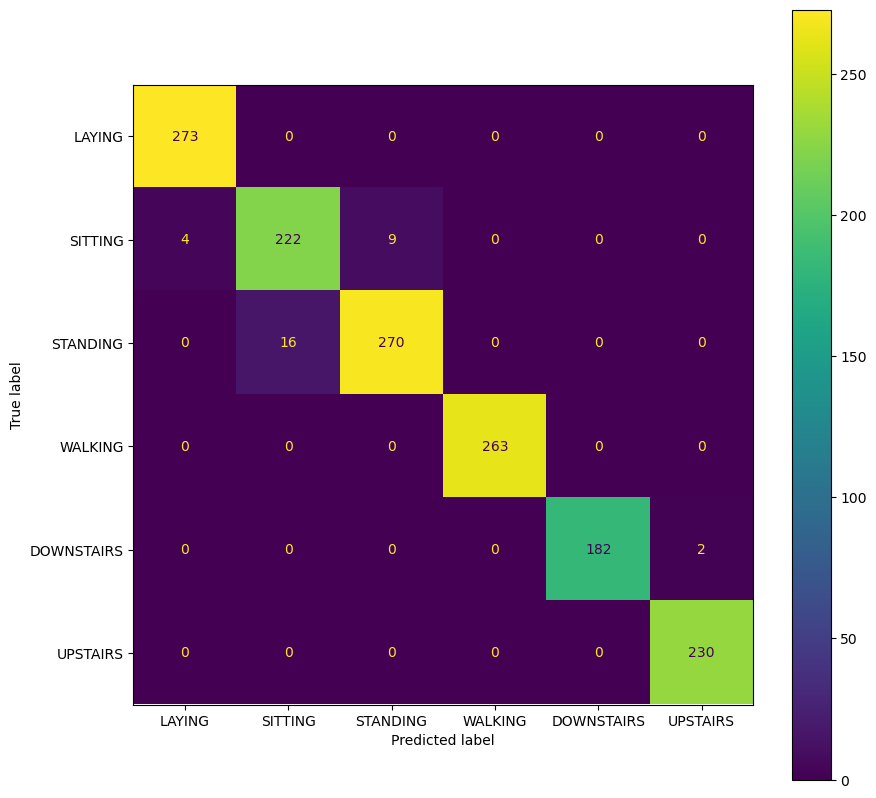

In [27]:
lda=LinearDiscriminantAnalysis().fit(x_train,y_train)
evaluate_classification(lda,'LinearDiscriminantAnalysis',x_train,x_test,y_train,y_test)

Training Accuracy K Nearest Neighbours 95.2729127699371  Test Accuracy K Nearest Neighbours 95.64921821889871
Training Precesion K Nearest Neighbours 95.2729127699371  Test Precesion K Nearest Neighbours 95.64921821889871
Training Recall K Nearest Neighbours 95.2729127699371  Test Recall K Nearest Neighbours 95.64921821889871


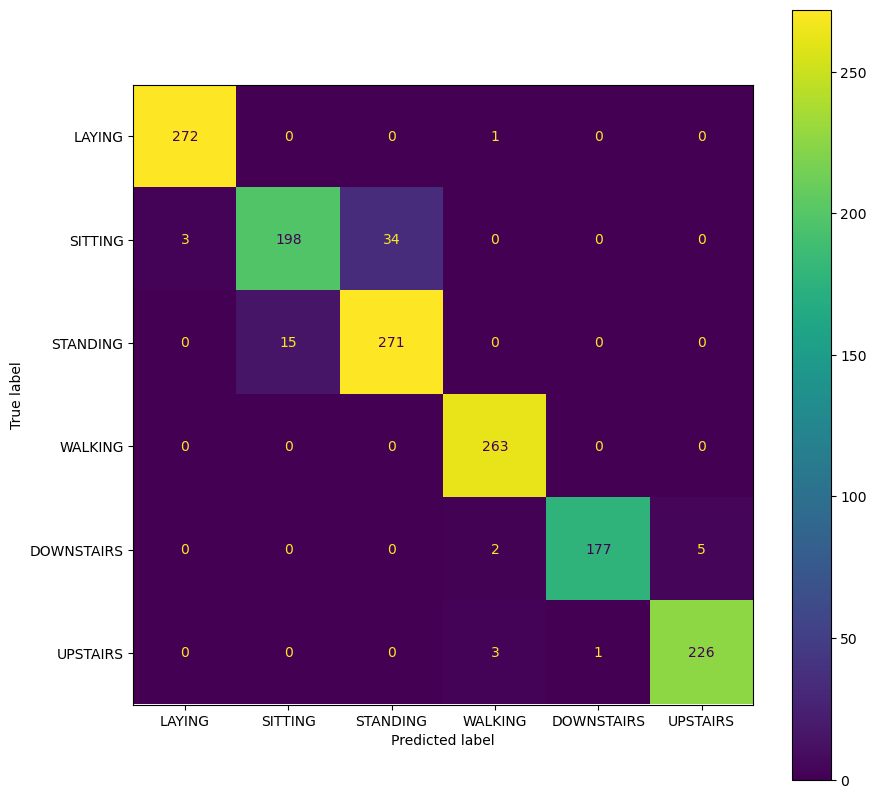

In [28]:
knn=KNeighborsClassifier(n_neighbors=30).fit(x_train,y_train)
evaluate_classification(knn,"K Nearest Neighbours",x_train,x_test,y_train,y_test)


Training Accuracy Gaussian Naives Baiyes 77.792892365244  Test Accuracy Gaussian Naives Baiyes 78.38205302515296
Training Precesion Gaussian Naives Baiyes 77.792892365244  Test Precesion Gaussian Naives Baiyes 78.38205302515296
Training Recall Gaussian Naives Baiyes 77.792892365244  Test Recall Gaussian Naives Baiyes 78.38205302515296


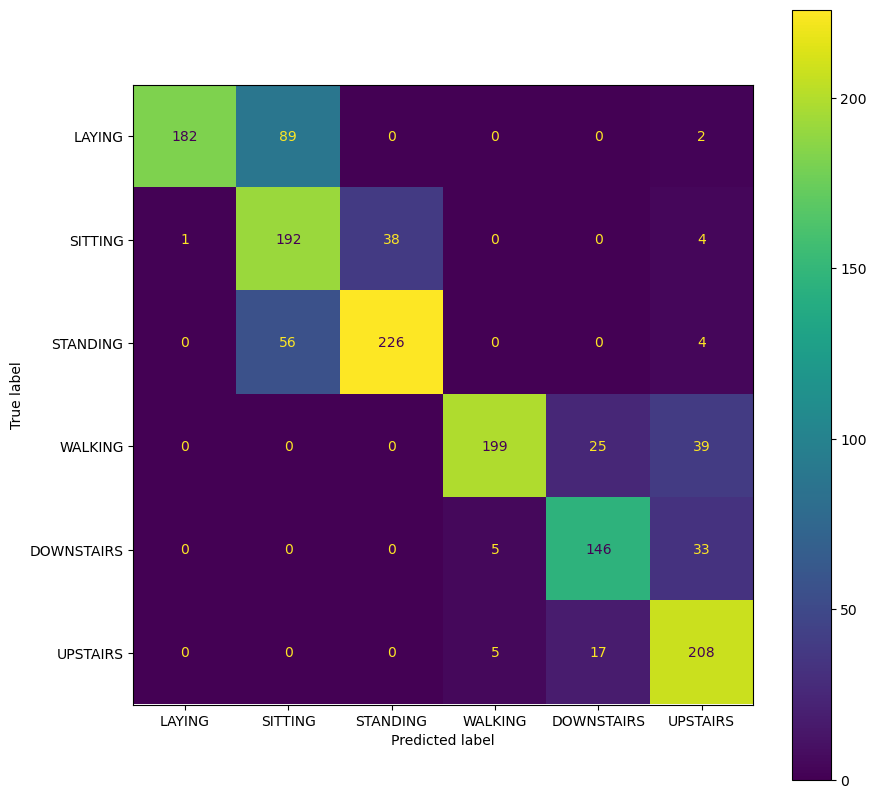

In [29]:
gnb=GaussianNB().fit(x_train,y_train)
evaluate_classification(gnb,"Gaussian Naives Baiyes",x_train,x_test,y_train,y_test)

Training Accuracy Linear Support vector mmachine 99.55789831661282  Test Accuracy Linear Support vector mmachine 98.77634262406526
Training Precesion Linear Support vector mmachine 99.55789831661282  Test Precesion Linear Support vector mmachine 98.77634262406526
Training Recall Linear Support vector mmachine 99.55789831661282  Test Recall Linear Support vector mmachine 98.77634262406526


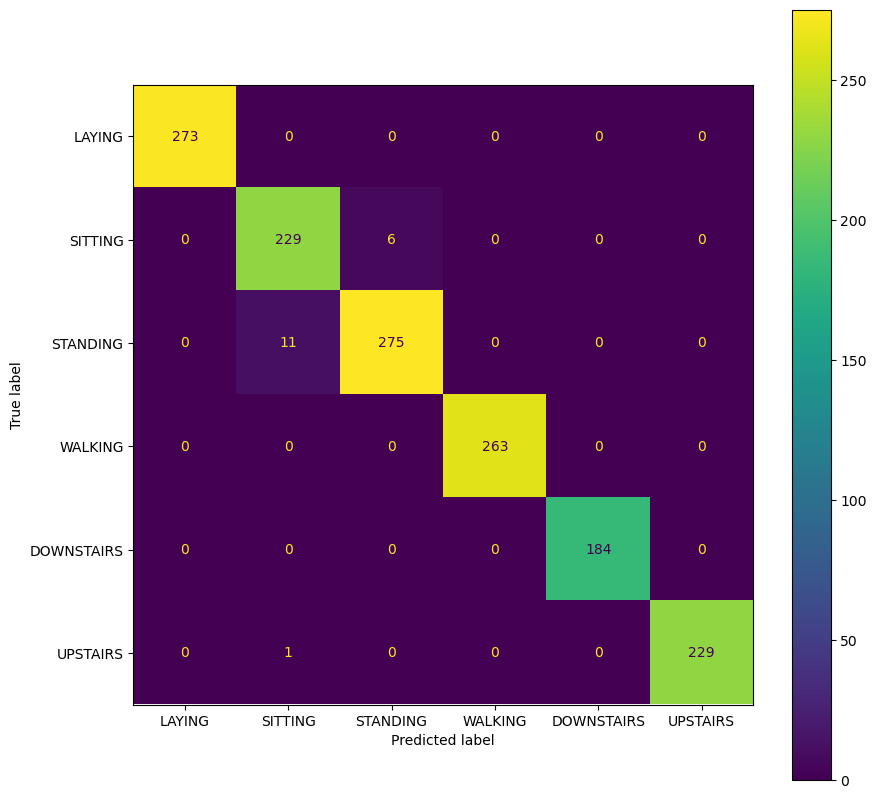

In [30]:
lin_svc=svm.LinearSVC().fit(x_train,y_train)
evaluate_classification(lin_svc,"Linear Support vector mmachine",x_train,x_test,y_train,y_test)

Training Accuracy Support vector machines default 97.61945247406904  Test Accuracy Support vector machines default 97.48470428280082
Training Precesion Support vector machines default 97.61945247406904  Test Precesion Support vector machines default 97.48470428280082
Training Recall Support vector machines default 97.61945247406904  Test Recall Support vector machines default 97.48470428280082


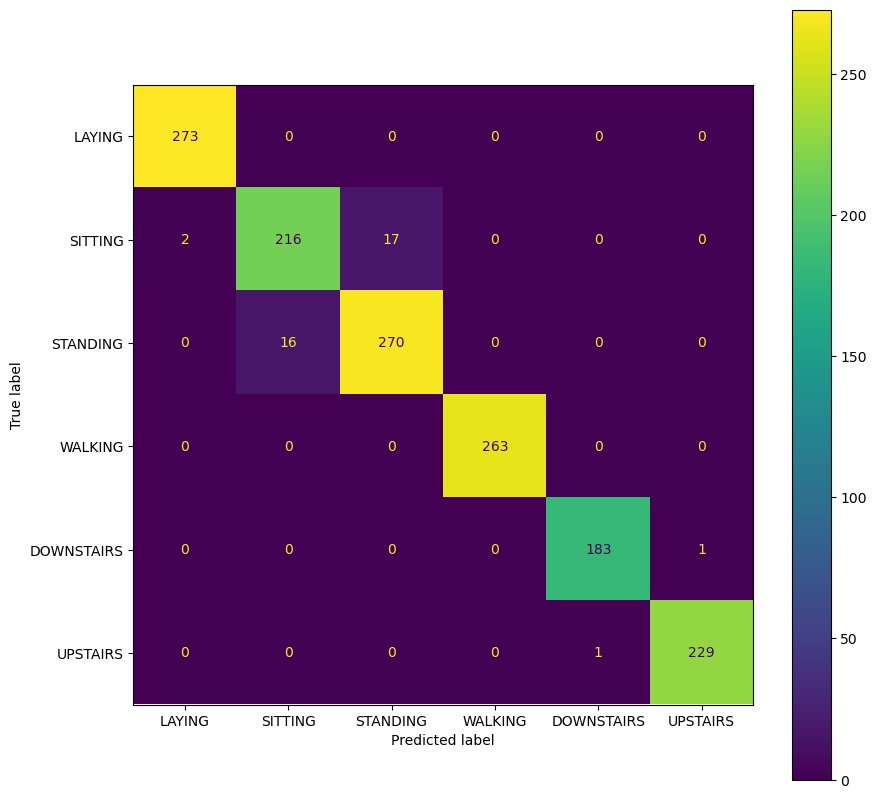

In [31]:
rbf=svm.SVC().fit(x_train,y_train)
evaluate_classification(rbf,'Support vector machines default',x_train,x_test,y_train,y_test)

Training Accuracy Decision Tree classifier 100.0  Test Accuracy Decision Tree classifier 93.47382732834805
Training Precesion Decision Tree classifier 100.0  Test Precesion Decision Tree classifier 93.47382732834805
Training Recall Decision Tree classifier 100.0  Test Recall Decision Tree classifier 93.47382732834805


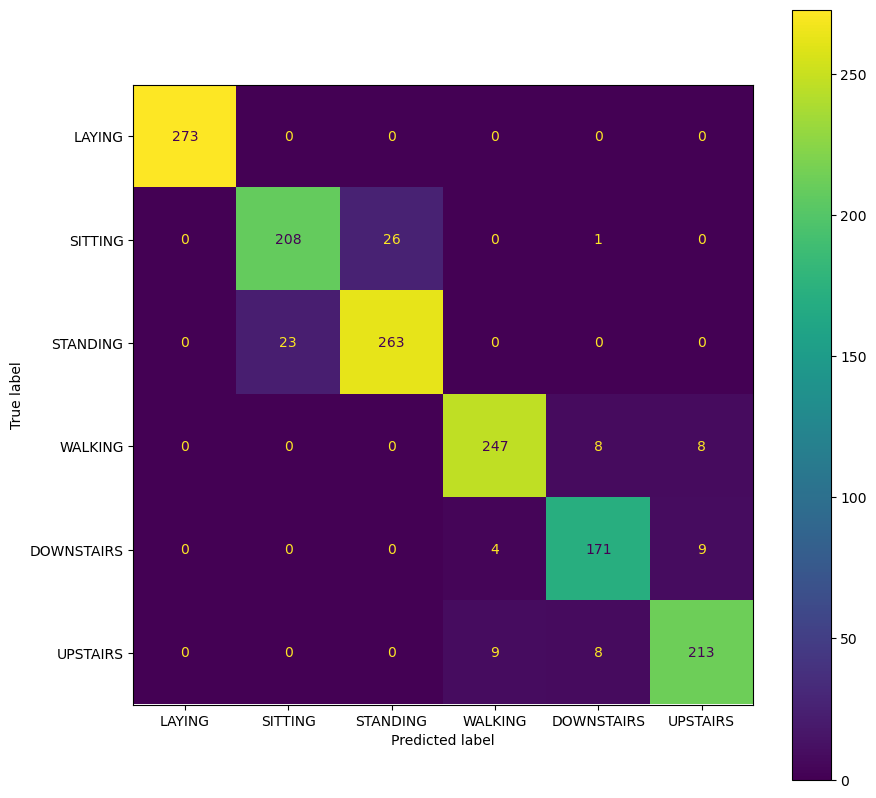

In [32]:
tdt=DecisionTreeClassifier().fit(x_train,y_train)
evaluate_classification(tdt,"Decision Tree classifier",x_train,x_test,y_train,y_test)

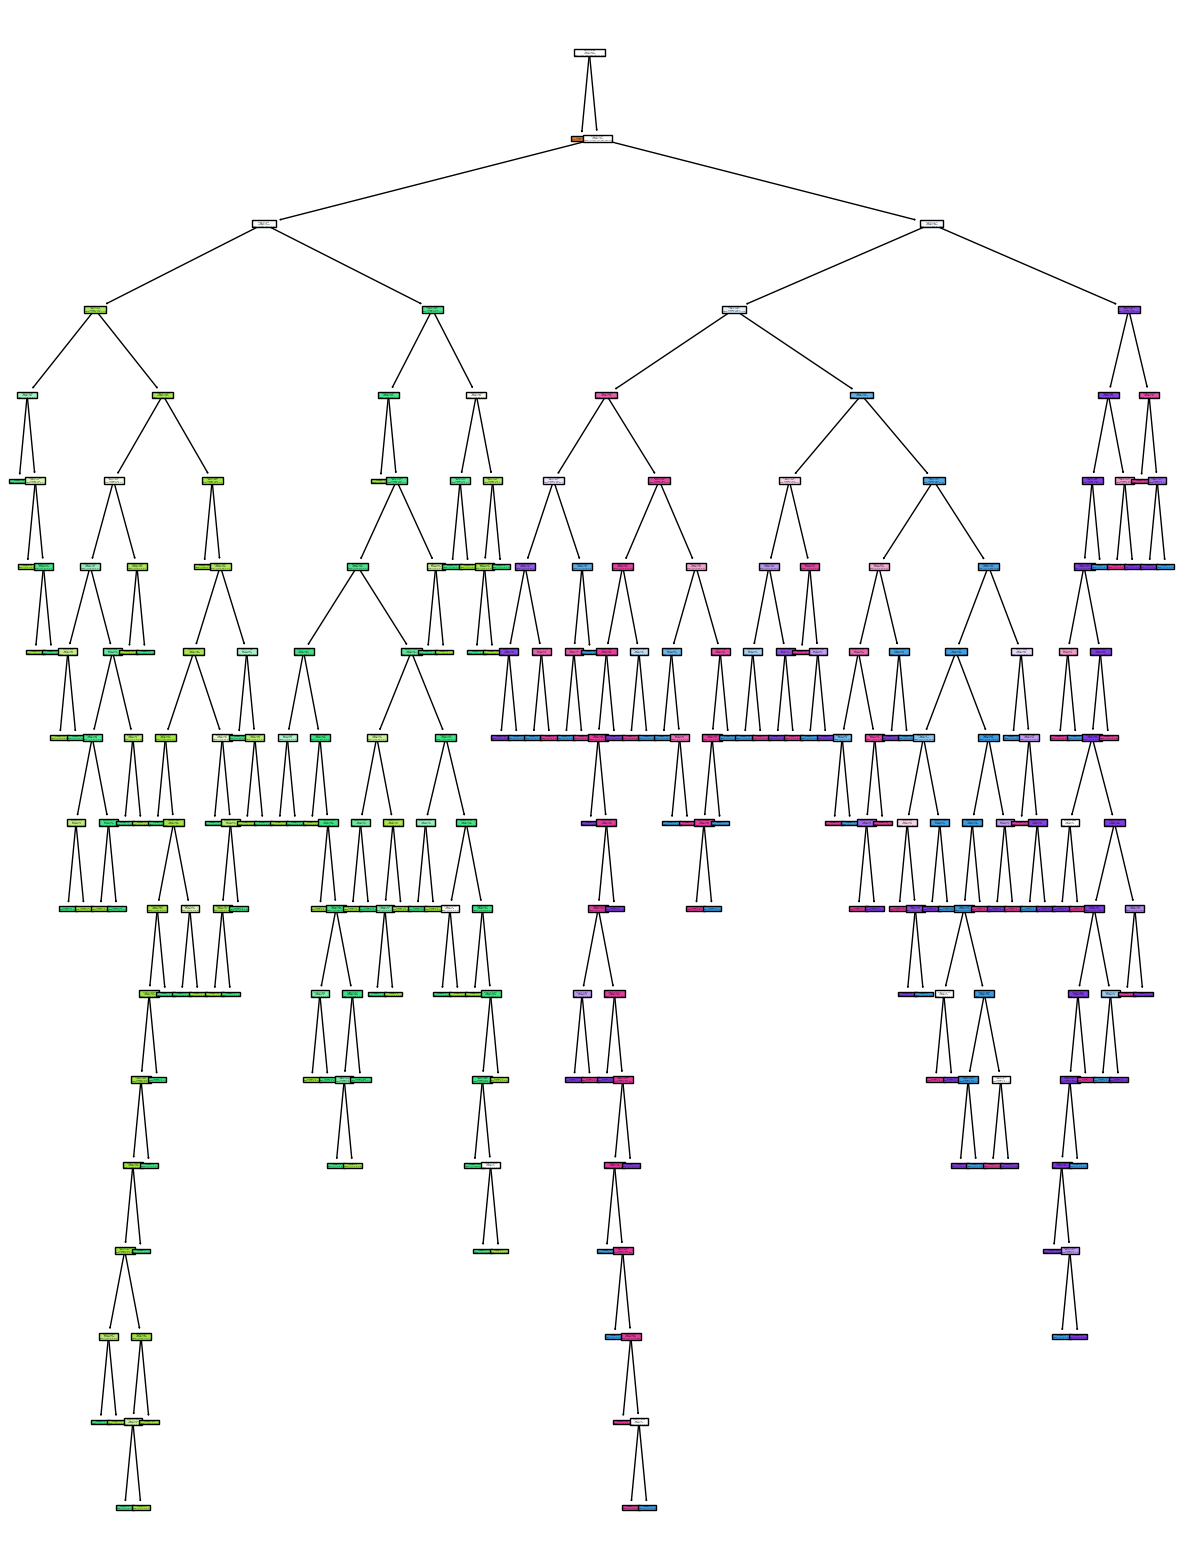

In [33]:
fig=plt.figure(figsize=(15,20))
tree.plot_tree(tdt,filled=True)
plt.show()

Training Accuracy Random Forest Classifier 100.0  Test Accuracy Random Forest Classifier 98.30047586675731
Training Precesion Random Forest Classifier 100.0  Test Precesion Random Forest Classifier 98.30047586675731
Training Recall Random Forest Classifier 100.0  Test Recall Random Forest Classifier 98.30047586675731


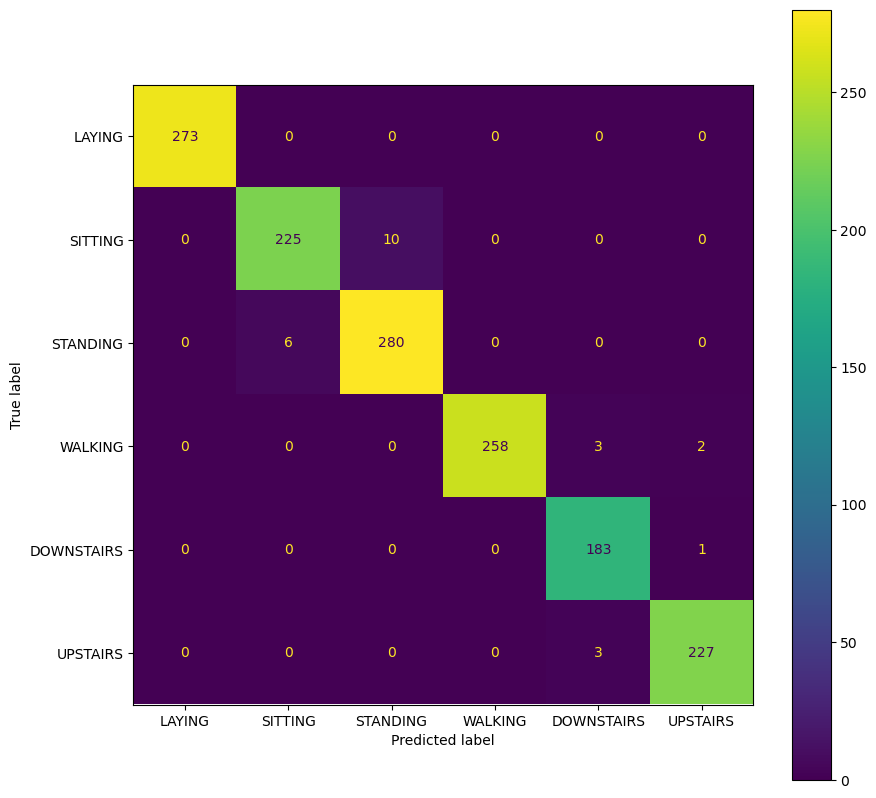

In [34]:
rf=RandomForestClassifier().fit(x_train,y_train)
evaluate_classification(rf,'Random Forest Classifier',x_train,x_test,y_train,y_test)

Training Accuracy XGBclassifier 98.792722326135  Test Accuracy XGBclassifier 97.3487423521414
Training Precesion XGBclassifier 98.792722326135  Test Precesion XGBclassifier 97.3487423521414
Training Recall XGBclassifier 98.792722326135  Test Recall XGBclassifier 97.3487423521414


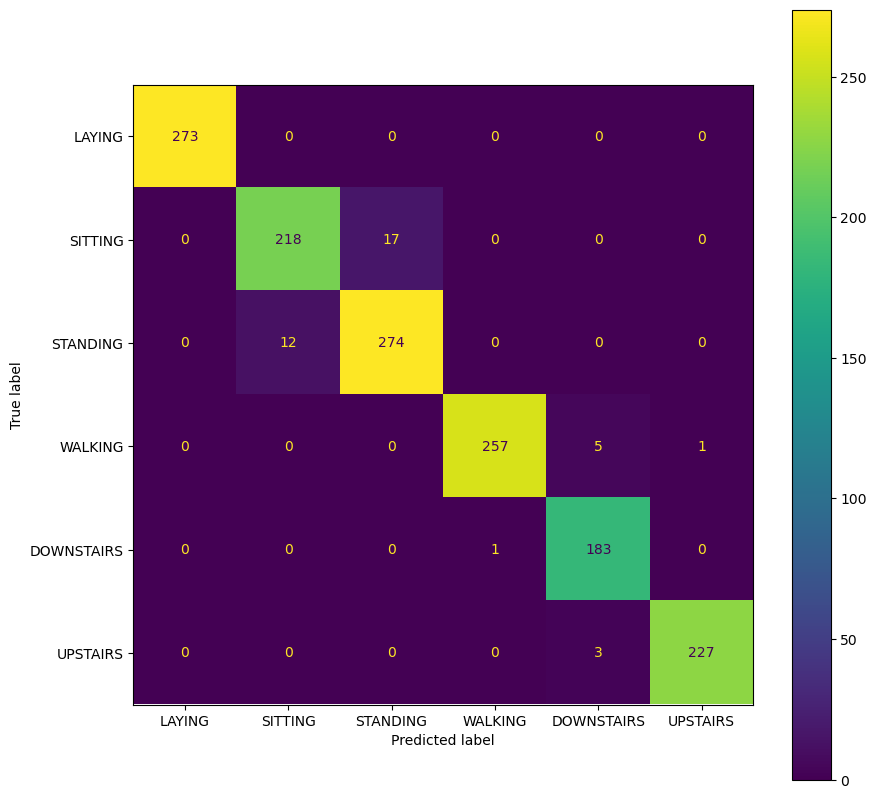

In [35]:
le=preprocessing.LabelEncoder().fit(y_train)
y_xgb_train=le.transform(y_train)
y_xgb_test=le.transform(y_test)

xgb_params={'n_estimators':100,
           'learning_rate':0.2,
           'subsample':0.927,
           'colsample_bytree':0.88,
           'max_depth':5,
           'booster':'gbtree',
           'reg_lambda':38,
           'reg_alpha':32,
           'random_state':12}
xgb=XGBClassifier(**xgb_params).fit(x_train,y_xgb_train)
evaluate_classification(xgb,'XGBclassifier',x_train,x_test,y_xgb_train,y_xgb_test)

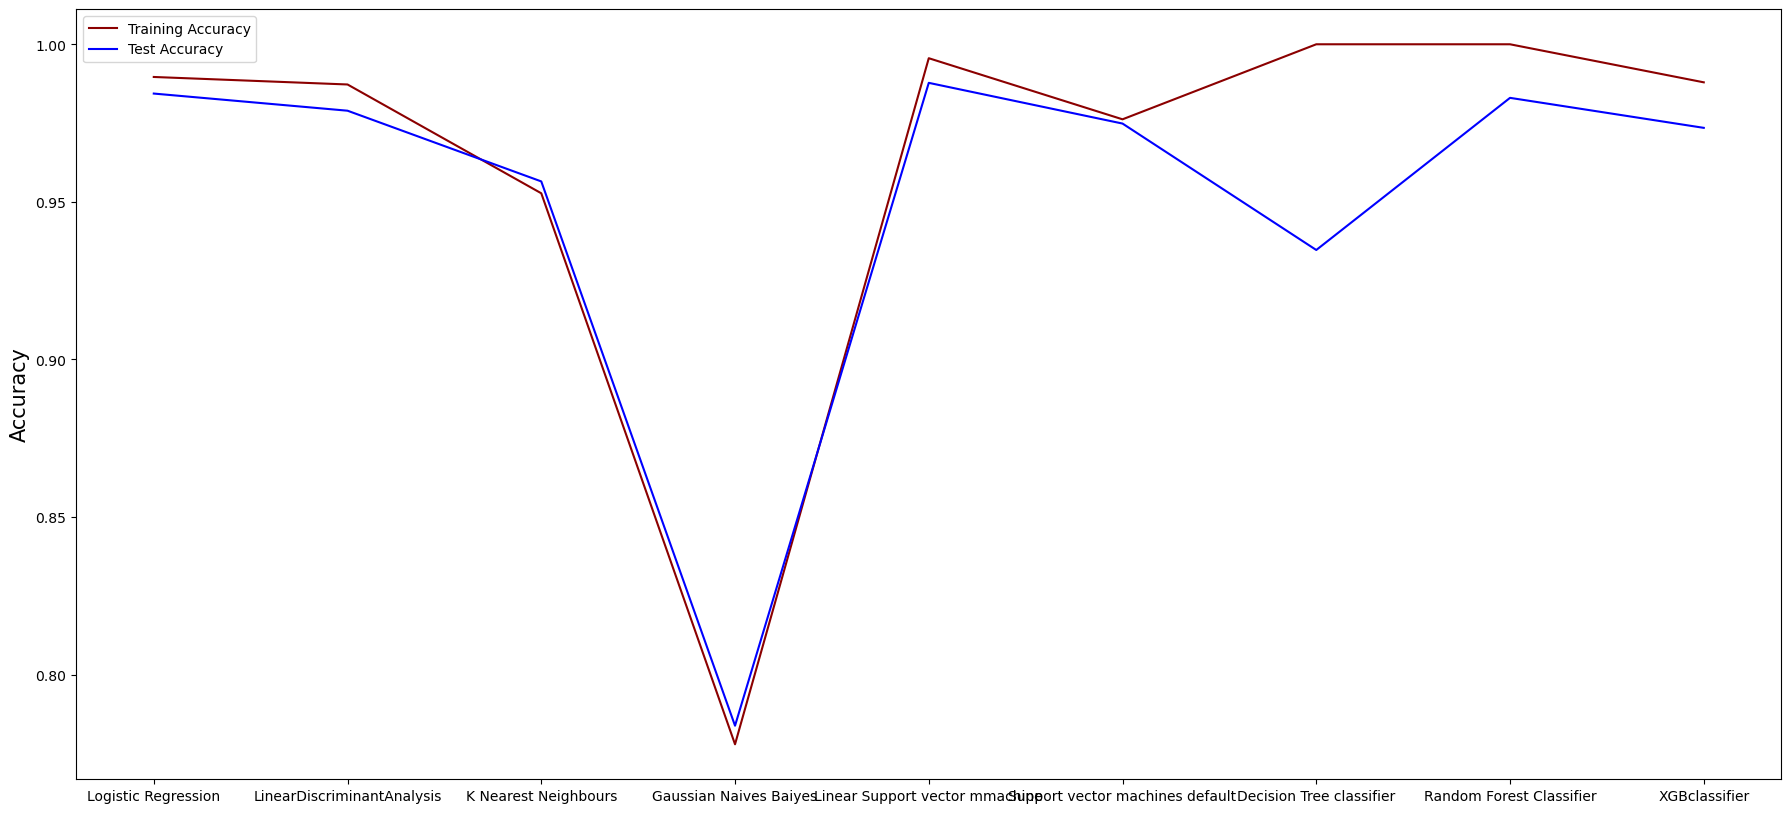

In [36]:
keys=[key for key in kernal_evals.keys()]
values=[value  for value in kernal_evals.values()]
# print(len(values))
# print(kernal_evals)
fig,ax=plt.subplots(figsize=(22,10))
ax.plot(np.arange(len(keys)),[value[0] for value in values],color='darkred')
ax.plot(np.arange(len(keys)),[value[1] for value in values],color='b')
ax.legend(['Training Accuracy','Test Accuracy'])
ax.set_xticklabels(keys,size=10)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel('Accuracy',size=15)

plt.show()

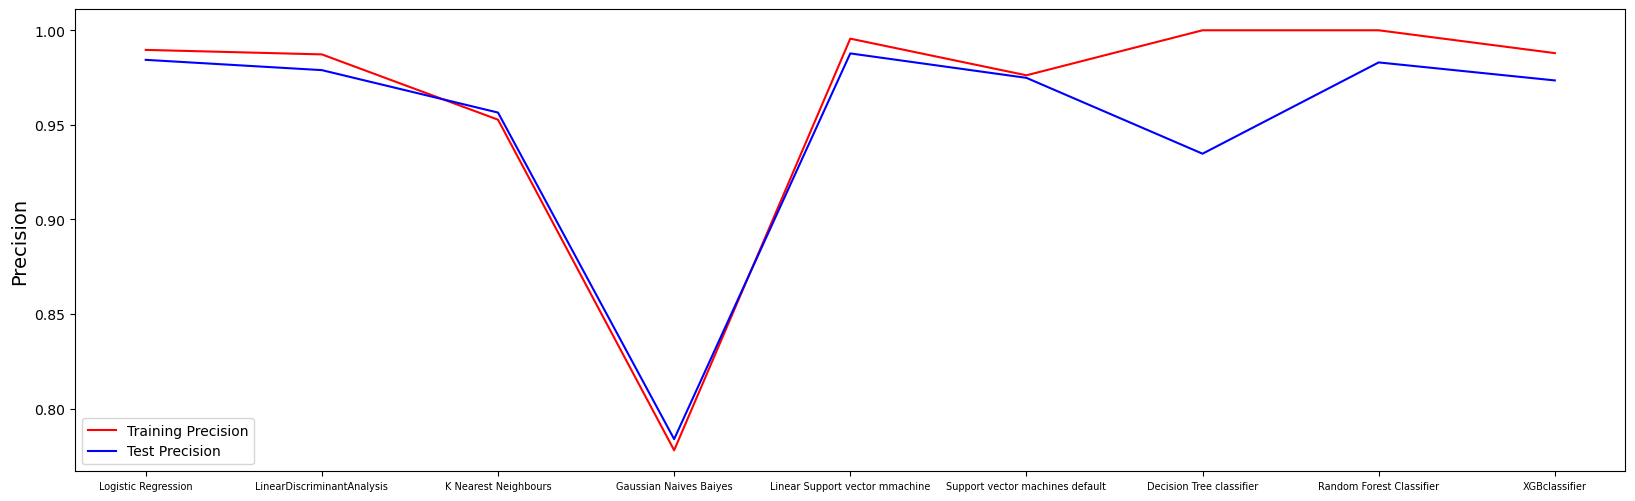

In [37]:
keys=[key for key in kernal_evals.keys()]
values=[value for value in kernal_evals.values()]

fig,ax=plt.subplots(figsize=(20,6))
ax.plot(np.arange(len(keys)),[value[2] for value in values],color='r')
ax.plot(np.arange(len(keys)),[value[3] for value in values],color='b')
ax.legend(['Training Precision','Test Precision'])
ax.set_xticks(np.arange(len(keys)))
ax.set_xticklabels(keys,size=7)
plt.ylabel('Precision',size=14)
plt.show()

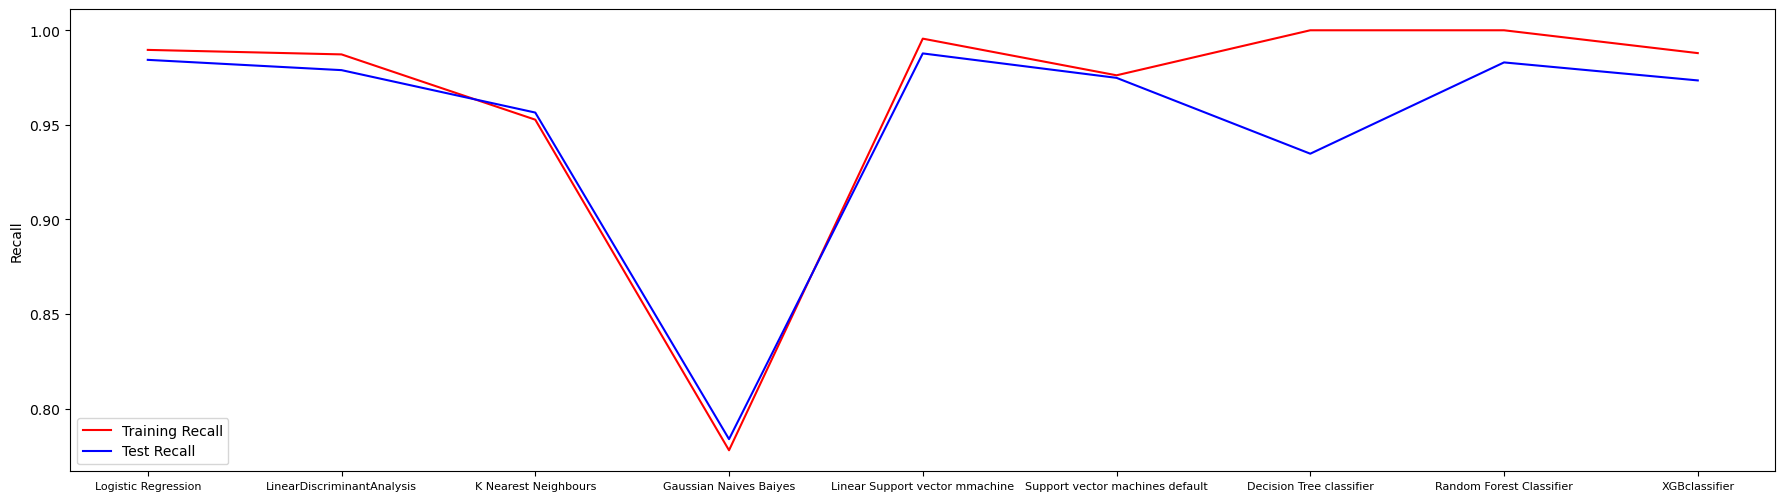

In [38]:
keys=[key for key in kernal_evals.keys()]
values=[value for value in kernal_evals.values()]
fig,ax=plt.subplots(figsize=(22,6))
ax.plot(np.arange(len(keys)),[value[4] for value in values],color='r')
ax.plot(np.arange(len(keys)),[value[5] for value in values],color='b')
ax.legend(['Training Recall','Test Recall'])
ax.set_xticklabels(keys,size=8)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()

Training Accuracy Linear SVC(PCA) 99.28583574222071  Test Accuracy Linear SVC(PCA) 98.84432358939496
Training Precesion Linear SVC(PCA) 99.28583574222071  Test Precesion Linear SVC(PCA) 98.84432358939496
Training Recall Linear SVC(PCA) 99.28583574222071  Test Recall Linear SVC(PCA) 98.84432358939496


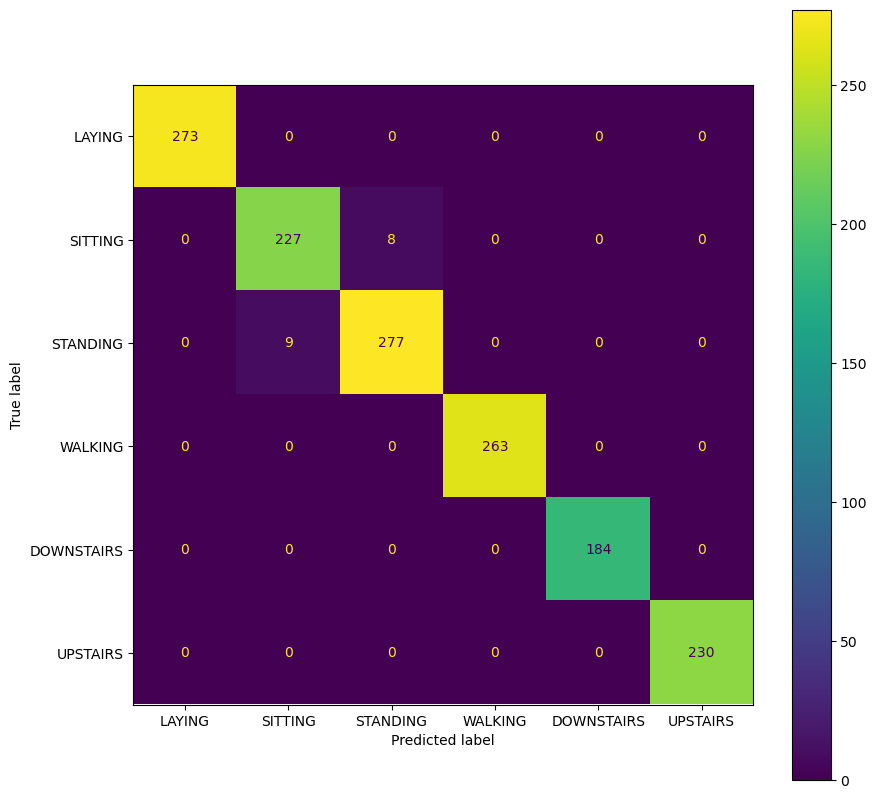

In [52]:
lin_svc_pca=svm.LinearSVC().fit(x_train_pca,y_train_pca)
evaluate_classification(lin_svc_pca,'Linear SVC(PCA)',x_train_pca,x_test_pca,y_train_pca,y_test_pca)

Training Accuracy Linear SVC(frequency) 97.97653460295868  Test Accuracy Linear SVC(frequency) 96.60095173351462
Training Precesion Linear SVC(frequency) 97.97653460295868  Test Precesion Linear SVC(frequency) 96.60095173351462
Training Recall Linear SVC(frequency) 97.97653460295868  Test Recall Linear SVC(frequency) 96.60095173351462


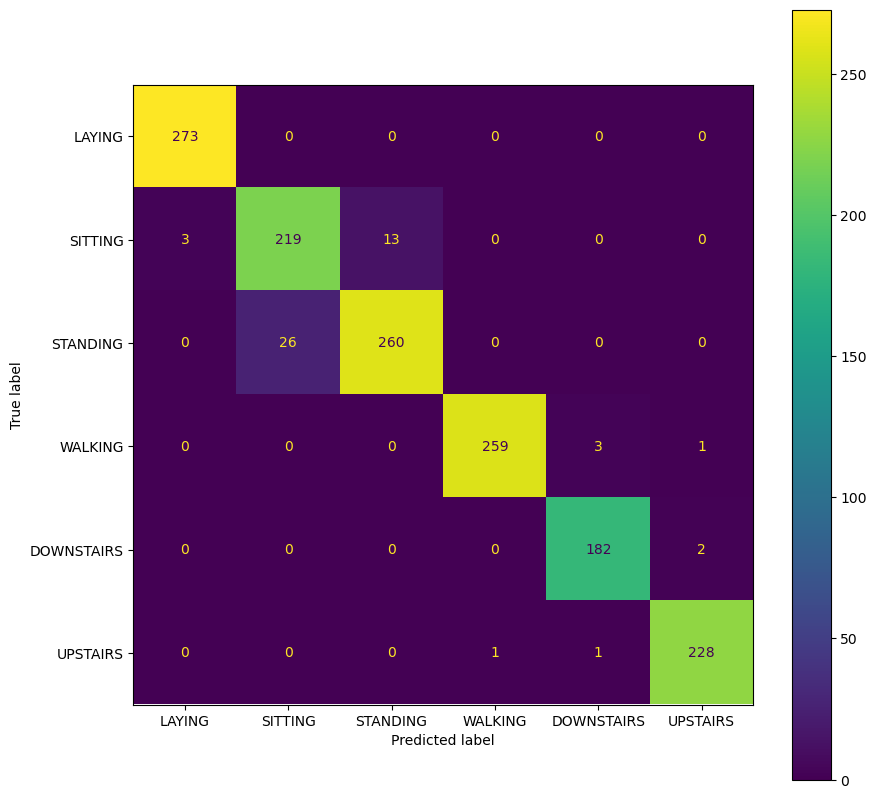

In [40]:
lin_svc_f=svm.LinearSVC().fit(x_train_f,y_train_f)
evaluate_classification(lin_svc_f,"Linear SVC(frequency)",x_train_f,x_test_f,y_train_f,y_test_f)

Training Accuracy Linear SVC(Time) 99.33684747491924  Test Accuracy Linear SVC(Time) 98.91230455472467
Training Precesion Linear SVC(Time) 99.33684747491924  Test Precesion Linear SVC(Time) 98.91230455472467
Training Recall Linear SVC(Time) 99.33684747491924  Test Recall Linear SVC(Time) 98.91230455472467


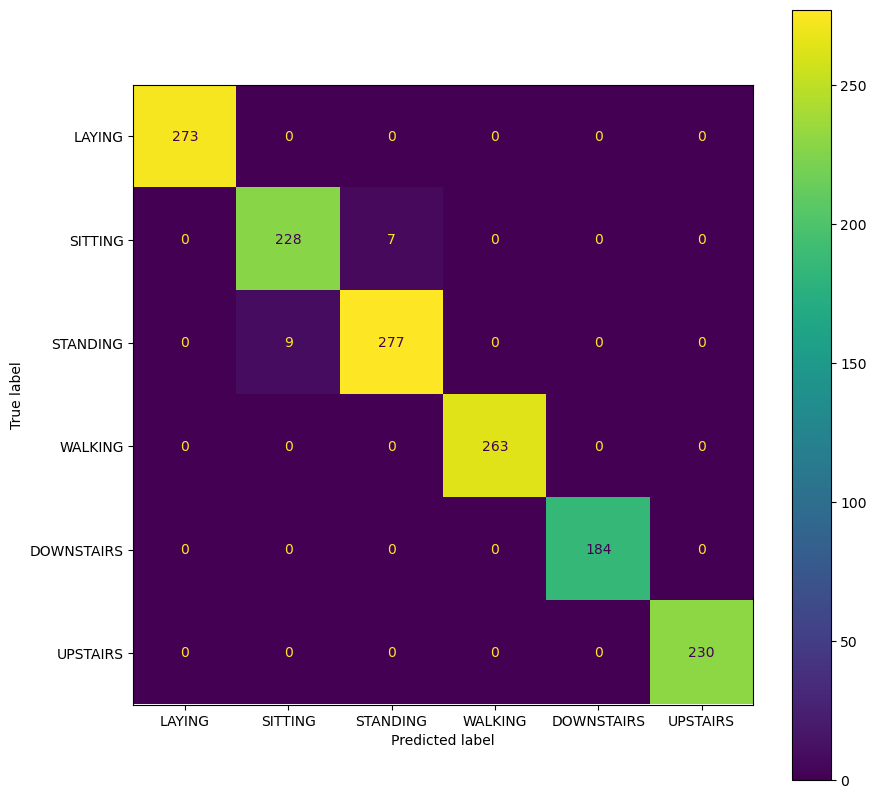

In [44]:
lin_svc_t=svm.LinearSVC().fit(x_train_t,y_train_t)
evaluate_classification(lin_svc_t,"Linear SVC(Time)",x_train_t,x_test_t,y_train_t,y_test_t)

Number of best for Anova is 180
Training Accuracy Linear SVC (K) 98.70770277163747  Test Accuracy Linear SVC (K) 98.57239972807615
Training Precesion Linear SVC (K) 98.70770277163747  Test Precesion Linear SVC (K) 98.57239972807615
Training Recall Linear SVC (K) 98.70770277163747  Test Recall Linear SVC (K) 98.57239972807615


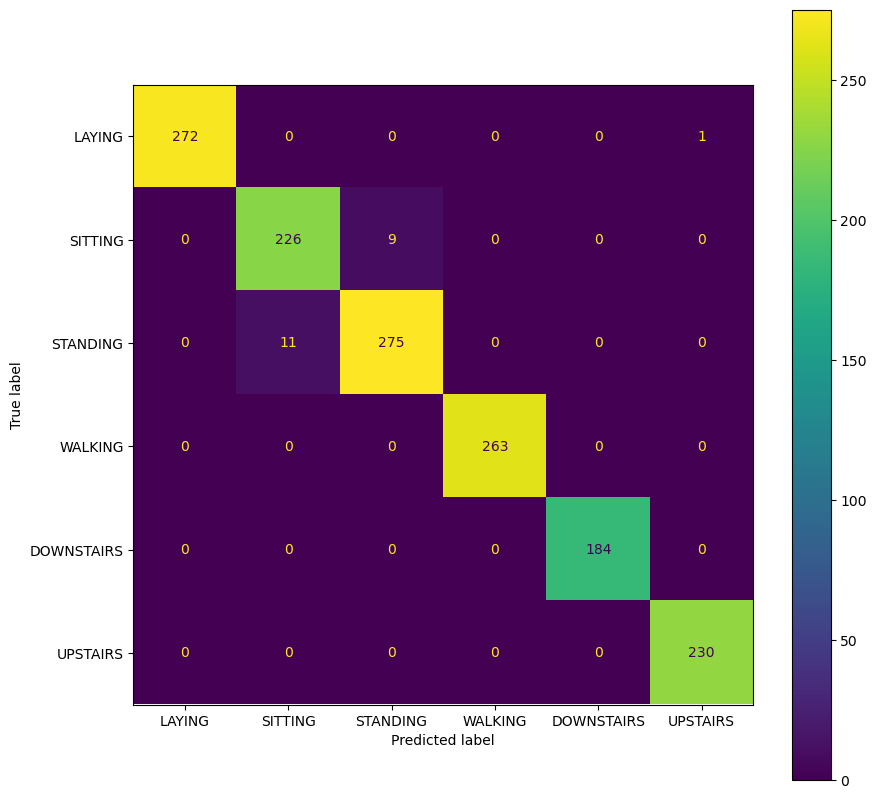

In [47]:
X_f_classif_k=SelectKBest(score_func=f_classif,k=180).fit_transform(X_t,y_t)
print('Number of best for Anova is {}'.format(X_f_classif_k.shape[1]))
x_train_k,x_test_k,y_train_k,y_test_k=train_test_split(X_f_classif_k,y,test_size=0.2,shuffle=True,random_state=42)
lin_svc_k=svm.LinearSVC().fit(x_train_k,y_train_k)
evaluate_classification(lin_svc_k,'Linear SVC (K)',x_train_k,x_test_k,y_train_k,y_test_k)


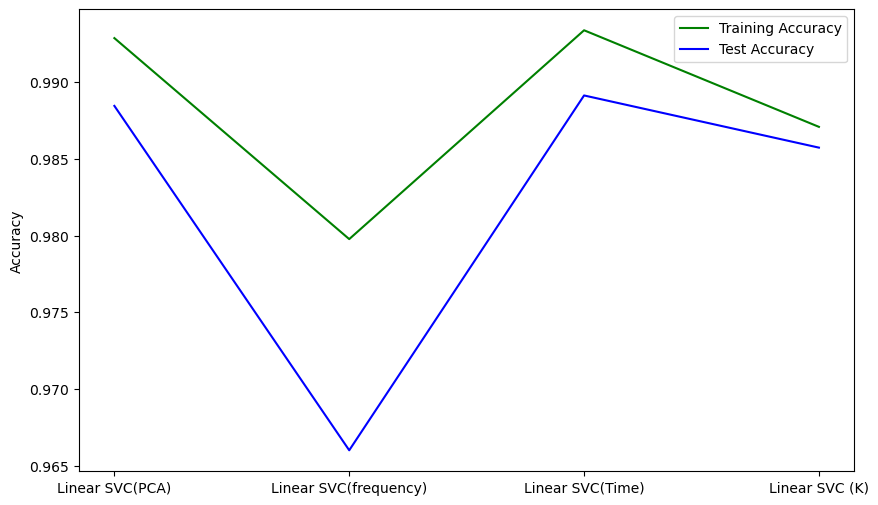

In [59]:
keys=['Linear SVC(PCA)','Linear SVC(frequency)','Linear SVC(Time)','Linear SVC (K)']
values=[]
for i in keys:
    values.append(kernal_evals[i])
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(np.arange(len(keys)),[value[0] for value in values],color='g')
ax.plot(np.arange(len(keys)),[value[1] for value in values],color='b')
ax.legend(['Training Accuracy','Test Accuracy'])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel('Accuracy')
plt.show()